In [1]:
import pandas as pd
import numpy as np
from operator import attrgetter
import seaborn as sns

In [2]:
!pip install pandas openpyxl

In [7]:
path ="/content/online_retail_II.xlsx"
df = pd.read_excel(path,parse_dates= ['InvoiceDate'], dtype= {
    'Customer ID' : str,
    'Invoice' : str,
    'StockCode' : str
})

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [9]:
df= df.dropna(subset= 'Customer ID').reset_index(drop= True)

In [10]:
df_invoice= df.drop_duplicates(
    subset= ['Invoice'])[['Invoice', 'InvoiceDate','Customer ID']].reset_index(drop= True)

Calculate the maximum time interval between a user's two consecutive purchases:

In [11]:
def max_purchase_widnow(df):
    customers = df['Customer ID'].unique()
    dff = pd.DataFrame()
    for customer in customers:
        temp_df = df[df['Customer ID'] == customer].sort_values(
            by='InvoiceDate').reset_index(drop=True)
        diff_dates = []
        for i in range(len(temp_df) - 1):
            diff = temp_df.loc[i+1, 'InvoiceDate'] - temp_df.loc[i, 'InvoiceDate']
            diff_dates.append(diff)
            max_diff = np.max(diff_dates)
            dff.loc[customer, 'max_diff'] = max_diff
    return dff

Determination of user churn

<Axes: xlabel='max_diff', ylabel='Count'>

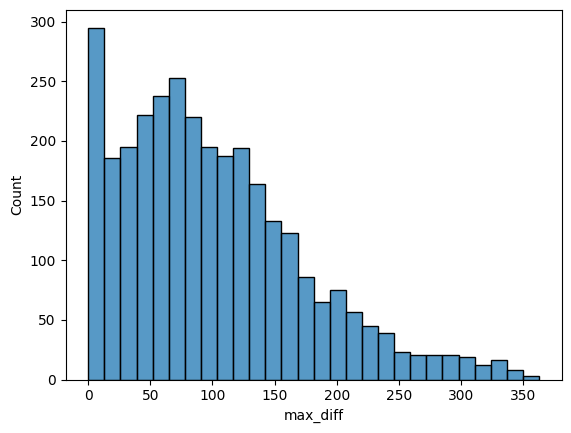

In [14]:
df_max_interval= max_purchase_widnow(df_invoice)

dff= df_max_interval['max_diff'].apply(attrgetter('days'))
sns.histplot(dff, kde= False)

By examining the histogram, we can infer that the number of customers making purchases starts to decline after approximately 130 days. This value may be the optimal threshold for identifying churned customers. This means that any customers who extend their latest purchase interval beyond 130 days in the future are likely to be potential churned customers.